## Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/HW2---PaternRecognition/

'2021-2022-Pattern Recognition-KHMT1-CSC14006-HW02.pdf'  'Source Code.ipynb'
'Analysis&Prediction.ipynb'				  test.csv
 images							  test.pkl
 model							  train.csv
 Preprocessing.ipynb					  train.pkl
 sample_submission.csv


In [ ]:
!pip install visualkeras

## Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
from PIL import ImageFont

import pickle
from sklearn.model_selection import train_test_split

##Load data

In [ ]:
with open("/content/drive/MyDrive/HW2---PaternRecognition/train.pkl", "rb") as f:
    x_train, y_train = pickle.load(f)

## Data statistics

Text(0, 0.5, 'Number of sample')

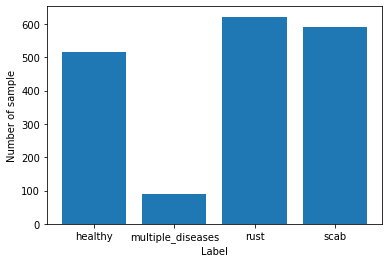

In [ ]:
label = ['healthy', 'multiple_diseases', 'rust', 'scab']
count = [(y_train==i).sum() for i in range(4)]
plt.bar(label,count)
plt.xlabel("Label")
plt.ylabel("Number of sample")

## Split the training set into 2 parts: training set and validation set

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(1274, 180, 180, 3)
(547, 180, 180, 3)
(1274,)
(547,)


## Data augmentation

In [ ]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

## Build a CNN architecture

In [ ]:
EPOCHS = 30
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 180
HEIGHT = 180
DEPTH = 3

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (WIDTH,HEIGHT,DEPTH)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=LR), metrics=['accuracy'])

## Visualize a CNN architecture

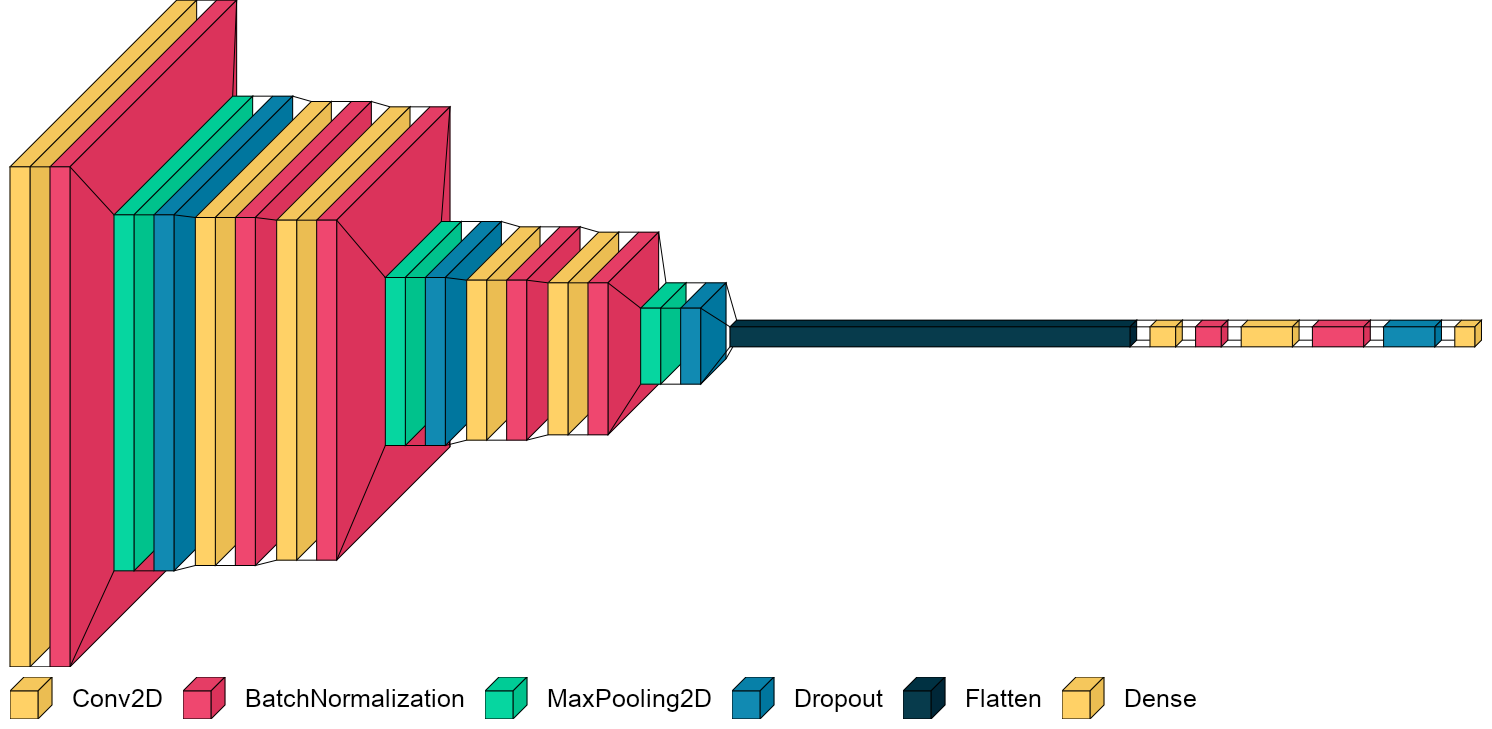

In [ ]:
font = ImageFont.truetype("/content/drive/MyDrive/HW2---PaternRecognition/arial.ttf", 25)
visualkeras.layered_view(model, legend=True, max_xy=500, spacing=20, font=font)

## Train model

In [ ]:
result = model.fit_generator(augment.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              validation_data=(X_val, Y_val),
                              steps_per_epoch=len(X_train) // BATCH_SIZE,
                              epochs=EPOCHS, 
                              verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
39/39 [==============================] - 14s 309ms/step - loss: 2.0540 - accuracy: 0.3398 - val_loss: 1.6833 - val_accuracy: 0.2888
Epoch 2/30
39/39 [==============================] - 12s 304ms/step - loss: 1.8122 - accuracy: 0.3857 - val_loss: 6.4011 - val_accuracy: 0.0530
Epoch 3/30
39/39 [==============================] - 13s 324ms/step - loss: 1.7572 - accuracy: 0.3591 - val_loss: 3.9250 - val_accuracy: 0.3346
Epoch 4/30
39/39 [==============================] - 12s 304ms/step - loss: 1.6050 - accuracy: 0.3977 - val_loss: 2.8221 - val_accuracy: 0.3346
Epoch 5/30
39/39 [==============================] - 12s 304ms/step - loss: 1.4180 - accuracy: 0.4436 - val_loss: 2.9365 - val_accuracy: 0.3346
Epoch 6/30
39/39 [==============================] - 12s 311ms/step - loss: 1.3700 - accuracy: 0.4726 - val_loss: 3.5349 - val_accuracy: 0.2139
Epoch 7/30
39/39 [==============================] - 12s 299ms/step - loss: 1.2745 - accuracy: 0.4863 - val_loss: 2.8044 - val_accuracy: 0.3675

## History of the model training process

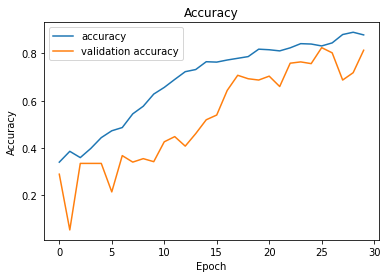

In [ ]:
fig = plt.figure()
numOfEpoch = 30
plt.plot(np.arange(0, numOfEpoch), result.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), result.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

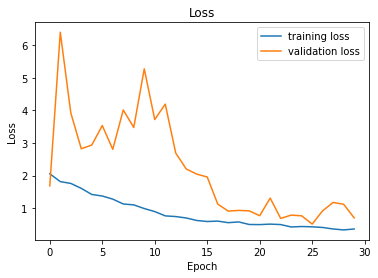

In [ ]:
plt.plot(np.arange(0, numOfEpoch), result.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), result.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## Load our best model 

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/HW2---PaternRecognition/model")

## Evaluate model

### On training set

In [ ]:
pred = np.argmax(model.predict(X_train),axis=1)
print(classification_report(Y_train,pred,target_names=label))

                   precision    recall  f1-score   support

          healthy       0.94      0.95      0.95       362
multiple_diseases       0.93      0.62      0.74        63
             rust       0.97      1.00      0.98       442
             scab       0.95      0.95      0.95       407

         accuracy                           0.95      1274
        macro avg       0.95      0.88      0.90      1274
     weighted avg       0.95      0.95      0.95      1274



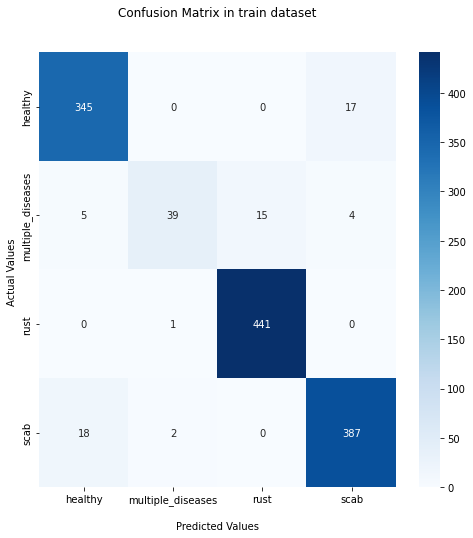

In [ ]:
cf_matrix = confusion_matrix(Y_train,pred)
plt.figure(figsize=(8,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Confusion Matrix in train dataset\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

## Display the visualization of the Confusion Matrix.
plt.show()

### On validation set

In [ ]:
pred = np.argmax(model.predict(X_val),axis=1)
print(classification_report(Y_val,pred,target_names=label))

                   precision    recall  f1-score   support

          healthy       0.96      0.96      0.96       154
multiple_diseases       0.89      0.61      0.72        28
             rust       0.96      0.99      0.97       180
             scab       0.96      0.97      0.97       185

         accuracy                           0.96       547
        macro avg       0.94      0.88      0.91       547
     weighted avg       0.96      0.96      0.95       547



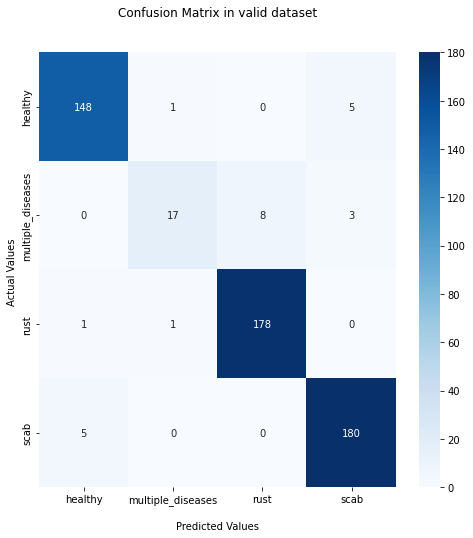

In [ ]:
cf_matrix = confusion_matrix(Y_val,pred)
plt.figure(figsize=(8,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Confusion Matrix in valid dataset\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

## Display the visualization of the Confusion Matrix.
plt.show()